In [92]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [93]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [94]:
class Diabetes:
    
    def __init__(self,i_node,h_node,o_node,lr):
        # 2층 hidden layer unit 
        # 은닉층 가중치  W2  Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(i_node,h_node)/np.sqrt(i_node/2)
        self.b2 = np.random.rand(h_node)      
        
        # 출력층 가중치는 W3  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(h_node, o_node) / np.sqrt(h_node/2)
        self.b3 = np.random.rand(o_node)      
        
        # 학습률 learning rate 초기화
        self.lr = lr
        
    def feed_forward(self):
        
        z2 = np.dot(self.xdata,self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(z3)
        delta = 1e-7
        
        loss = -np.sum(self.tdata*np.log(y+delta)+(1-self.tdata)*np.log((1-y)+delta))
        return loss
    
    def loss_val(self):
        
        z2 = np.dot(self.xdata,self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(z3)
        delta = 1e-7
        
        loss = -np.sum(self.tdata*np.log(y+delta)+(1-self.tdata)*np.log((1-y)+delta))
        return loss
    
    def predict(self, input_data):
        
        z2 = np.dot(self.xdata,self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        predicted_num = np.argmax(y)
            
        return predicted_num
            
    def train(self,xdata,tdata):
        
        self.xdata = xdata
        self.tdata = tdata
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.lr * numerical_derivative(f, self.W2)
        self.W3 -= self.lr * numerical_derivative(f, self.W3)
        self.b2 -= self.lr * numerical_derivative(f, self.b2)
        self.b3 -= self.lr * numerical_derivative(f, self.b3)
        
    def accuracy(self,input_data,target_data):
        
        matched_list=[]
        not_matched_list=[]
        
        for index in range(len(input_data)):
            predicted_num = self.predict(input_data[index])
            label = int(target_data[index])
            if label == predicted_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
        accuracy_ret = len(matched_list)/len(input_data)
        print('Accuracy =>', accuracy_ret)
            

In [95]:
class DataGeneration:
    
    def __init__(self,file_path,seperation_rate):
        
        self.file_path = file_path
        self.seperation_rate = seperation_rate
    
    def generate(self):
        
        try:
            loaded_data = np.loadtxt(self.file_path,delimiter=',',dtype=np.float32)
            
        except Exception as err:
            
            raise Exception (str(err))
            
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)
        
        test_data = loaded_data[:test_data_num]
        training_data = loaded_data[test_data_num:]
        
        print('test_data.shape = ',test_data.shape,' ,training data shape = ',training_data.shape)
        return training_data, test_data

In [96]:
seperation_rate = 0.3
try:
    data_obj1 = DataGeneration('./(200309)diabetes.csv',seperation_rate)
    training_data , test_data =data_obj1.generate()

except Exception as err:
    print('Exception occur!!!')
    print(str(err))

test_data.shape =  (227, 9)  ,training data shape =  (532, 9)


In [98]:
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 10  # hidden 1 nodes 개수. 

o_nodes = 2    # one-hot encoding 표현하기 위한 output nodes 개수는 2개. 즉 정답은 0 또는 1 두개만 있음

lr = 1e-2     # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 30   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list

# Diabetes 객체 생성
obj1 = Diabetes( i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        
        # one-hot encoding 방식으로 표현                
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[index, -1])] = 0.99
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()    
    loss_val_list.append(cur_loss_val)
    
    print("step = ", step, " , current loss value = ", cur_loss_val)

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Neural Network Learning using Numerical Derivative...
step =  0  , current loss value =  1.013782967115675
step =  1  , current loss value =  0.9904865930083117
step =  2  , current loss value =  0.966243242916342
step =  3  , current loss value =  0.9406425862956322
step =  4  , current loss value =  0.9124911766752661
step =  5  , current loss value =  0.8810301503464519
step =  6  , current loss value =  0.8459408959034584
step =  7  , current loss value =  0.8073497670089128
step =  8  , current loss value =  0.7658041343150852
step =  9  , current loss value =  0.7222001100140261
step =  10  , current loss value =  0.6776611237307459
step =  11  , current loss value =  0.6333857927145308
step =  12  , current loss value =  0.5904954786054895
step =  13  , current loss value =  0.5499124465518844
step =  14  , current loss value =  0.5122895887725512
step =  15  , current loss value =  0.47799675314076273
step =  16  , current loss value =  0.44715305204792766
step =  17  , current

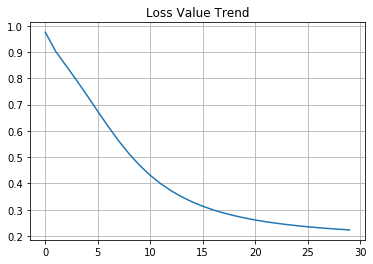

In [90]:
plt.title('Loss Value Trend')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [91]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

obj1.accuracy(test_input_data, test_target_data) 



Accuracy => 0.6255506607929515


In [ ]:
#seperation rate 바꿈

In [99]:
seperation_rate = 0.2
try:
    data_obj1 = DataGeneration('./(200309)diabetes.csv',seperation_rate)
    training_data , test_data =data_obj1.generate()

except Exception as err:
    print('Exception occur!!!')
    print(str(err))

test_data.shape =  (151, 9)  ,training data shape =  (608, 9)


In [100]:
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 10  # hidden 1 nodes 개수. 

o_nodes = 2    # one-hot encoding 표현하기 위한 output nodes 개수는 2개. 즉 정답은 0 또는 1 두개만 있음

lr = 1e-2     # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 30   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list

# Diabetes 객체 생성
obj1 = Diabetes( i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        
        # one-hot encoding 방식으로 표현                
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[index, -1])] = 0.99
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()    
    loss_val_list.append(cur_loss_val)
    
    print("step = ", step, " , current loss value = ", cur_loss_val)

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Neural Network Learning using Numerical Derivative...
step =  0  , current loss value =  0.9743217439449641
step =  1  , current loss value =  0.934614327207923
step =  2  , current loss value =  0.8935409335841208
step =  3  , current loss value =  0.8475210966472754
step =  4  , current loss value =  0.7955487474611982
step =  5  , current loss value =  0.738379455275396
step =  6  , current loss value =  0.6782964169840253
step =  7  , current loss value =  0.6184198223185913
step =  8  , current loss value =  0.561767948821576
step =  9  , current loss value =  0.5105132891923689
step =  10  , current loss value =  0.46572097809881197
step =  11  , current loss value =  0.42751030779985
step =  12  , current loss value =  0.39539598731271075
step =  13  , current loss value =  0.3686086389558859
step =  14  , current loss value =  0.34631366111282647
step =  15  , current loss value =  0.3277301249399299
step =  16  , current loss value =  0.31218039109563445
step =  17  , current 

In [101]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

obj1.accuracy(test_input_data, test_target_data) 



Accuracy => 0.6556291390728477


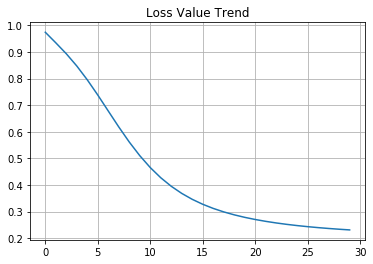

In [102]:
plt.title('Loss Value Trend')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [103]:
seperation_rate = 0.2
try:
    data_obj1 = DataGeneration('./(200309)diabetes.csv',seperation_rate)
    training_data , test_data =data_obj1.generate()

except Exception as err:
    print('Exception occur!!!')
    print(str(err))

test_data.shape =  (151, 9)  ,training data shape =  (608, 9)


In [104]:
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 15  # hidden 1 nodes 개수. 

o_nodes = 2    # one-hot encoding 표현하기 위한 output nodes 개수는 2개. 즉 정답은 0 또는 1 두개만 있음

lr = 1e-2     # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 30   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list

# Diabetes 객체 생성
obj1 = Diabetes( i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        
        # one-hot encoding 방식으로 표현                
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[index, -1])] = 0.99
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()    
    loss_val_list.append(cur_loss_val)
    
    print("step = ", step, " , current loss value = ", cur_loss_val)

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Neural Network Learning using Numerical Derivative...
step =  0  , current loss value =  0.8899518675452186
step =  1  , current loss value =  0.8371223977305806
step =  2  , current loss value =  0.7828584264128111
step =  3  , current loss value =  0.726268953661785
step =  4  , current loss value =  0.6680922463416974
step =  5  , current loss value =  0.6101996149651573
step =  6  , current loss value =  0.5549381982305732
step =  7  , current loss value =  0.5043823681755896
step =  8  , current loss value =  0.45982234145023215
step =  9  , current loss value =  0.4216584338697177
step =  10  , current loss value =  0.38960243609919465
step =  11  , current loss value =  0.3629774742005075
step =  12  , current loss value =  0.34096892888313046
step =  13  , current loss value =  0.32278019233777216
step =  14  , current loss value =  0.30770697477305775
step =  15  , current loss value =  0.2951599722573267
step =  16  , current loss value =  0.284660908343373
step =  17  , curr

In [105]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

obj1.accuracy(test_input_data, test_target_data) 


Accuracy => 0.6556291390728477


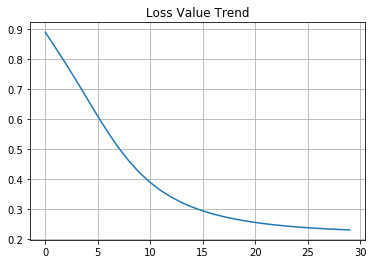

In [106]:
plt.title('Loss Value Trend')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [107]:
seperation_rate = 0.2
try:
    data_obj1 = DataGeneration('./(200309)diabetes.csv',seperation_rate)
    training_data , test_data =data_obj1.generate()

except Exception as err:
    print('Exception occur!!!')
    print(str(err))

test_data.shape =  (151, 9)  ,training data shape =  (608, 9)


In [108]:
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 10  # hidden 1 nodes 개수. 

o_nodes = 2    # one-hot encoding 표현하기 위한 output nodes 개수는 2개. 즉 정답은 0 또는 1 두개만 있음

lr = 1e-1     # learning rate. hi_node = 2, 1e-1 에서 수렴
epochs = 20   # 반복횟수. 

# 저장 리스트
loss_val_list = []    # loss val list

# Diabetes 객체 생성
obj1 = Diabetes( i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):
        
        input_data = training_data[index, 0:-1]
        
        # one-hot encoding 방식으로 표현                
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[index, -1])] = 0.99
        
        obj1.train(input_data, target_data)
        
    cur_loss_val = obj1.loss_val()    
    loss_val_list.append(cur_loss_val)
    
    print("step = ", step, " , current loss value = ", cur_loss_val)

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Neural Network Learning using Numerical Derivative...
step =  0  , current loss value =  0.678199985688313
step =  1  , current loss value =  0.3246298093677464
step =  2  , current loss value =  0.24963296499683138
step =  3  , current loss value =  0.22470492952295706
step =  4  , current loss value =  0.2127597044700179
step =  5  , current loss value =  0.20817846468544288
step =  6  , current loss value =  0.21028604976567056
step =  7  , current loss value =  0.217690309365558
step =  8  , current loss value =  0.2244049530916206
step =  9  , current loss value =  0.2228022242419419
step =  10  , current loss value =  0.21173482152896483
step =  11  , current loss value =  0.19617342559158746
step =  12  , current loss value =  0.18092097306181282
step =  13  , current loss value =  0.16809772185961652
step =  14  , current loss value =  0.15802485195575483
step =  15  , current loss value =  0.15032296928638153
step =  16  , current loss value =  0.14444968788489526
step =  17  

In [109]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

obj1.accuracy(test_input_data, test_target_data) 


Accuracy => 0.6556291390728477


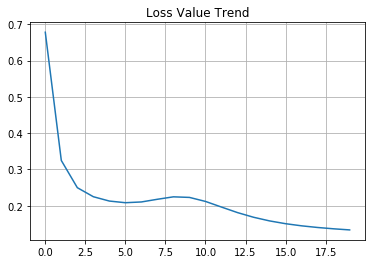

In [110]:
plt.title('Loss Value Trend')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [ ]:
#원래 했던 sigmoid로 선형분류하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [3]:
class Diabetes:
    
    def __init__(self,i_nodes,h_nodes,o_nodes,lr):
        
        self.W2 = np.random.randn(i_nodes,h_nodes)/np.sqrt(i_nodes/2)
        self.W3 = np.random.randn(h_nodes,o_nodes)/np.sqrt(h_nodes/2)
        self.b2 = np.random.rand(h_nodes)
        self.b3 = np.random.rand(o_nodes)
        
        self.lr = lr
        
    def feed_forward(self):
        
        z2 = np.dot(self.xdata,self.W2)+self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(z3)
        delta = 1e-7
        loss = -np.sum(self.tdata*np.log(y+delta)+(1-self.tdata)*np.log((1-y)+delta))
        return loss
    
    
    def loss_val(self):
        
        z2 = np.dot(self.xdata,self.W2)+self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(z3)
        delta = 1e-7
        loss = -np.sum(self.tdata*np.log(y+delta)+(1-self.tdata)*np.log((1-y)+delta))
        return loss
    
    def train(self,xdata,tdata):
        
        self.xdata = xdata
        self.tdata = tdata
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.lr * numerical_derivative(f, self.W2)
        self.W3 -= self.lr * numerical_derivative(f, self.W3)
        self.b2 -= self.lr * numerical_derivative(f, self.b2)
        self.b3 -= self.lr * numerical_derivative(f, self.b3)
        
    def predict(self,xdata):
        
        z2 = np.dot(self.xdata,self.W2)+self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        if y > 0.5:
            result = 1
        else: 
            result = 0
            
        return y, result 
    
    def accuracy(self,input_data,target_data):
        
        matched_list = []
        not_matched_list = []
        
        for index in range(len(input_data)):
            (real_val , logical_val) = self.predict(input_data[index])
            if logical_val == target_data[index]:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
            
        accuracy_result = len(matched_list)/len(target_data)
        print('Accuracy = >', accuracy_result)
        return not_matched_list, accuracy_result

In [4]:
class DataGeneration:
    
    def __init__(self,file_path,seperation_rate):
        
        self.file_path = file_path
        self.seperation_rate = seperation_rate
        
    def generate(self):
        
        try:
            loaded_data = np.loadtxt(self.file_path,delimiter=',',dtype=np.float32)
            
        except Exception as err:
            
            raise Exception (str(err))
            
        t_d_n = len(loaded_data)
        test_data_num = int(t_d_n * self.seperation_rate)
        
        test_data = loaded_data[:test_data_num]
        training_data = loaded_data[test_data_num:]
        print('test_data.shape = ',test_data.shape,'training_data.shape = ',training_data.shape)
        return training_data, test_data
    
    

In [5]:
try:
    data_obj1 = DataGeneration('./(200309)diabetes.csv',0.3)
    training_data, test_data = data_obj1.generate()
except Exception as err:
    print('Exception Occur!!!')
    print(str(err))

test_data.shape =  (227, 9) training_data.shape =  (532, 9)


In [9]:
i_nodes = training_data.shape[1]-1
h_nodes = 5
o_nodes = 1
lr = 1e-1
epochs = 20

obj1 = Diabetes(i_nodes,h_nodes,o_nodes,lr)

loss_val_list = []
start_time = datetime.now()
for step in range(epochs):
    for index in range(len(training_data)):
        input_data = training_data[index,0:-1]
        target_data = training_data[index,-1]
        
        obj1.train(input_data,target_data)
    
    cur_loss_val = obj1.loss_val()
    loss_val_list = []
    
    print('epochs = ', step+1,'loss value = ', obj1.loss_val())

end_time = datetime.now()

print('')
print('Elapsed Time = >', end_time - start_time)

epochs =  1 loss value =  0.40238684220985876
epochs =  2 loss value =  0.21993674127317042
epochs =  3 loss value =  0.14161177831751723
epochs =  4 loss value =  0.10933802367675798
epochs =  5 loss value =  0.09335831913837546
epochs =  6 loss value =  0.08414592834658666
epochs =  7 loss value =  0.07810493511086272
epochs =  8 loss value =  0.07372292837631823
epochs =  9 loss value =  0.07031921740518919
epochs =  10 loss value =  0.06756351844439469
epochs =  11 loss value =  0.06527913225788337
epochs =  12 loss value =  0.06336070410066068
epochs =  13 loss value =  0.061738546600261374
epochs =  14 loss value =  0.060362426563673605
epochs =  15 loss value =  0.05919401640589639
epochs =  16 loss value =  0.05820347326642712
epochs =  17 loss value =  0.057368145695909985
epochs =  18 loss value =  0.056672552755432676
epochs =  19 loss value =  0.05610930884088684
epochs =  20 loss value =  0.055680818726920676

Elapsed Time = > 0:00:42.407606


In [10]:
test_data = np.loadtxt('./(200309)diabetes.csv', delimiter=',', dtype=np.float32)
print("test_data.shape = ", test_data.shape)

test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

obj1.accuracy(test_input_data, test_target_data) 

test_data.shape =  (759, 9)
Accuracy = > 0.6534914361001317


([0,
  2,
  4,
  6,
  8,
  9,
  11,
  13,
  14,
  15,
  16,
  18,
  21,
  22,
  23,
  24,
  29,
  35,
  36,
  37,
  41,
  43,
  46,
  51,
  54,
  59,
  62,
  64,
  68,
  70,
  76,
  82,
  86,
  91,
  97,
  98,
  107,
  108,
  109,
  112,
  113,
  114,
  118,
  122,
  123,
  126,
  127,
  128,
  129,
  130,
  141,
  150,
  152,
  153,
  157,
  162,
  163,
  168,
  169,
  173,
  175,
  177,
  183,
  184,
  185,
  186,
  187,
  190,
  191,
  193,
  195,
  196,
  197,
  204,
  205,
  207,
  211,
  212,
  213,
  214,
  216,
  217,
  218,
  219,
  225,
  228,
  229,
  233,
  234,
  235,
  239,
  240,
  242,
  251,
  252,
  257,
  260,
  262,
  265,
  266,
  272,
  276,
  279,
  280,
  282,
  286,
  287,
  288,
  291,
  293,
  295,
  296,
  298,
  301,
  303,
  304,
  307,
  309,
  312,
  314,
  316,
  317,
  318,
  321,
  323,
  327,
  332,
  333,
  334,
  344,
  350,
  351,
  352,
  354,
  355,
  358,
  361,
  364,
  365,
  370,
  373,
  381,
  382,
  383,
  386,
  389,
  392,
  394,
  395,